## From: DOI 10.21981/8NFE-2F13 nanoHUB Tutorial on Machine Learning

Before executing this code in an SciServer Essentials 3 Compute container you will need to open a terminal shell (from the JupyterLad Launcher) and:

pip install pymatgen
pip install mendeleev

Then restart the Python kernel (in the Kernel menu above).

You'll then want to create a small file called mysecrets.py in the directory and given the following contents with your nanoHUB info on the appropriate lines (the nanoHUB remote ReadMe file has links to create a nanoHUB  web app): 

auth_data = {
    'client_id': 'your web apps client id',       # Get this when you register a web app
    'client_secret': 'your web app secret key',   # Get this when you register a web app
    'grant_type': 'password',
    'username': 'your nanohub username',        # Get this when you create a nanoHUB account
    'password': 'your nanohub password'         # Get this when you create a nanoHUB account
 }
 
Note that you should do all this more securely using environmental variables should you continue to work with nanoHUB remotely! 

## *Querying, Organizing and Visualizing Materials Data*


**Why?** Access to data associated with materials in electronic form enables engineers, scientists and
students to explore this data, display it graphically, find trends and develop models.

**What?** In this tutorial, we will learn how to query, organize and plot data from the databases associated with the Python libraries [Pymatgen](http://pymatgen.org/) and [Mendeleev](https://mendeleev.readthedocs.io/en/stable/). 

**How to use this?** This tutorial uses Python, some familiarity with programming would be beneficial but is not required. Run each code cell in order by clicking "Shift + Enter". Feel free to modify the code, or change queries to familiarize yourself with the workings on the code.


Suggested modifications and exercises are included in <font color=blue> blue</font>.

**Outline:**

1. Query from Pymatgen
2. Processing and Organizing Data
3. Plotting
4. Query from Mendeleev

**Get started:** Click "Shift-Enter" on the code cells to run! 

In [1]:
# These lines import both libraries and then define an array with elements to be used below
# You'll need to install pymatgen and mendeleev (use conda or pip)

import pymatgen.core as pymat
import mendeleev as mendel
import pandas as pd

elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg',
            'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr',
            'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br',
            'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag',
            'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'Hf', 'Ta', 'W',
            'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'La', 'Ce', 'Pr',
            'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
            'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']

### 1. Query from Pymatgen

Pymatgen is an open-source library in python used for material analysis. Pymatgen is a powerful and popular resource that can be used to access data in the two repositories: the [Materials Project](https://materialsproject.org/) and the [Crystallography Open Database](http://www.crystallography.net/cod/). Pymatgen makes querying these resources and obtain data from its internal database easy. We will start by querying the database within the library by using the **Element** class.

Making a query in Pymatgen requires the chemical symbol of the element, which are all listed in the cell above. From there, the property is accessible as an attribute of that Element object. For a list of all the properties available click [here](http://pymatgen.org/pymatgen.core.periodic_table.html?pymatgen.core.periodic_table.Specie.element) to learn more about the Element class.

In this example we will query the Young's modulus for the elements in the list "sample". You will be able to see the values with the corresponding units for this quantity. You can use the commented code to query all the properties listed for the "sample" elements.

In [2]:
querable_pymatgen = ["atomic_mass", "poissons_ratio","atomic_radius", "electrical_resistivity","molar_volume","thermal_conductivity", "bulk_modulus", "youngs_modulus", 
                    "brinell_hardness", "average_ionic_radius", "melting_point", "rigidity_modulus", "density_of_solid","coefficient_of_linear_thermal_expansion"]

sample = ['Fe', 'Co', 'Ni', 'Cu', 'Zn']

for item in sample:
    element_object = pymat.periodic_table.Element(item)
    print(item, element_object.youngs_modulus) # You can change "youngs_modulus" to any of the properties in the querable_pymatgen list
    
#for item in sample:
#    for i in querable_pymatgen:
#        element_object = pymat.Element(item)
#        print(item, i, getattr(element_object,i))

Fe 211.0 GPa
Co 209.0 GPa
Ni 200.0 GPa
Cu 130.0 GPa
Zn 108.0 GPa


 * <font color=blue> **Exercise 1.** Modify the query above to extract Brinell hardness. </font>
 * <font color=blue> **Exercise 2.** Uncomment the lines above to see all the properties of the selected elements. </font>
 
 Remember: "Shift-Enter" to re-run the cell.
 

### 2. Processing and Organizing Data

After going through the basics of a query, we will now learn how to organize data in Python lists and dictionaries.

Entries in a dictionary have a name (in our case, the element) and attributes associated with it. Dictonaries can be useful to store a collection of data values from a particular element. In this example, we will create one to store some of the properties for Iron, using queries from both of the libraries we discussed. Note that the specific heat is obtained from Mendeleev, which is another database to access properties of elements.

In [3]:
Fe_data = {} # Initializing a dictionary

# Each of the following lines is making a single entry

Fe_data["atomic_number"] = mendel.element("Fe").atomic_number 
Fe_data["coefficient_of_linear_thermal_expansion"] = pymat.Element("Fe").coefficient_of_linear_thermal_expansion
Fe_data["youngs_modulus"] = pymat.Element("Fe").youngs_modulus
Fe_data["specific_heat"] = mendel.element("Fe").specific_heat

#Print the entire entry for Fe
print(Fe_data)

#Print a specific attribute:
print(Fe_data["specific_heat"])

# This line is to delete an entry
    # del Fe_data["atomic_number"]

{'atomic_number': 26, 'coefficient_of_linear_thermal_expansion': 1.18e-05, 'youngs_modulus': 211.0, 'specific_heat': 0.449}
0.449


Another way we can organize data is in lists, which can be very helpful if we want to create plots with our data. Following the examples above, we will now query two specific properties for all elements to get a list of values which will be indexed corresponding to the positions of the elements in the "elements" list in the first cell of the tutorial.

In [4]:
sample = elements.copy()

CTE = [] # In this list we will store the Coefficients of Thermal Expansion
youngs_modulus = [] # In this list we will store the Young's Moduli
melting_temperature = [] # In this list we will store the Melting Temperatures

for item in sample:
    CTE.append(pymat.Element(item).coefficient_of_linear_thermal_expansion)
    youngs_modulus.append(pymat.Element(item).youngs_modulus)
    melting_temperature.append(pymat.Element(item).melting_point)

# You can visualize the lists by uncommenting these print statements
#print(CTE)
#print(youngs_modulus)
#print(melting_temperature)

# We will use the following arrays to group elements by their crystal structure at RT, all elements that are gases and liquids at RT have been removed

fcc_elements = ["Ag", "Al", "Au", "Cu", "Ir", "Ni", "Pb", "Pd", "Pt", "Rh", "Sr", "Th", "Yb"]
bcc_elements = ["Ba", "Cr", "Cs", "Eu", "Fe", "K", "Li", "Mn", "Mo", "Na", "Nb", "P", "Rb", "Ta", "V", "W" ]
hcp_elements = ["Be", "Ca", "Cd", "Co", "Dy", "Er", "Gd", "Hf", "Ho", "Lu", "Mg", "Os", "Re", "Ru", "Sc", "Tb", "Tc","Ti", "Tl", "Tm", "Y", "Zn", "Zr"]

# Others (Solids): "B", "Sb", "Sm", "Bi" and "As" are Rhombohedral; "C" , "Ce" and "Sn" are Allotropic; "Si" and "Ge" are Face-centered diamond-cubic; "Pu" is Monoclinic;
#                  "S", "I", "U", "Np" and "Ga" are Orthorhombic; "Se" and "Te" Hexagonal; "In" and "Pa" are Tetragonal; "la", "Pr", "Nd", "Pm" are Double hexagonal close-packed;

Finally, the most efficient way we to visualize how the dataset we just created looks is to use the [Pandas](https://pandas.pydata.org/) library to display it. This library will take the list of lists and show it in a nice, user-friendly table with the properties as the column headers.

For this exercise, we will work with the data extracted for elements with the <b>FCC crystal structure</b>. 

First, we will create a list of lists using a for-loop and the values we can query from the Pymatgen library. We can specify the names for each column from our array of properties we queried. 

In [5]:
all_values = [] # Values for Attributes

for item in fcc_elements:
    element_values = []

    element_object = pymat.Element(item)    
    for i in querable_pymatgen:
        element_values.append(getattr(element_object,i))
        
    all_values.append(element_values) # All lists are appended to another list, creating a list of lists
    
# Pandas Dataframe
df = pd.DataFrame(all_values, columns=querable_pymatgen)
display(df)

,atomic_mass,poissons_ratio,atomic_radius,electrical_resistivity,molar_volume,thermal_conductivity,bulk_modulus,youngs_modulus,brinell_hardness,average_ionic_radius,melting_point,rigidity_modulus,density_of_solid,coefficient_of_linear_thermal_expansion
0,107.868200,0.37,1.60,1.630000e-08,10.27,430.0,100.0,83.0,24.5,1.086667,1234.93,30.0,10490.0,0.000019
1,26.981539,0.35,1.25,2.700000e-08,10.00,235.0,76.0,70.0,245.0,0.675000,933.47,26.0,2700.0,0.000023
2,196.966569,0.44,1.35,2.200000e-08,10.21,320.0,220.0,78.0,2450.0,1.070000,1337.33,27.0,19300.0,0.000014
3,63.546000,0.34,1.35,1.720000e-08,7.11,400.0,140.0,130.0,874.0,0.820000,1357.77,48.0,8920.0,0.000017
4,192.217000,0.26,1.35,4.700000e-08,8.52,150.0,320.0,528.0,1670.0,0.765000,2739.00,210.0,22650.0,0.000006
5,58.693400,0.31,1.35,7.200000e-08,6.59,91.0,180.0,200.0,700.0,0.740000,1728.00,76.0,8908.0,0.000013
6,207.200000,0.44,1.80,2.100000e-07,18.26,35.0,46.0,16.0,38.3,1.122500,600.61,5.6,11340.0,0.000029
7,106.420000,0.39,1.40,1.080000e-07,8.56,72.0,180.0,121.0,37.3,0.846250,1828.05,44.0,12023.0,0.000012
8,195.084000,0.38,1.35,1.060000e-07,9.09,72.0,230.0,168.0,392.0,0.805000,2041.40,61.0,21090.0,0.000009
9,102.905500,0.26,1.35,4.300000e-08,8.28,150.0,380.0,275.0,1100.0,0.745000,2237.00,150.0,12450.0,0.000008


Pandas allows for easier manipulation of the data than the structures we discussed before, both dictionaries and lists of lists.
We can make modifications to this dataframe in each of the following cells, to showcase the flexibility the Pandas library offers.

To make this dataframe look better for example, we can start by using the list of elements instead of numbered rows.

In [6]:
df.index = fcc_elements
display(df)

,atomic_mass,poissons_ratio,atomic_radius,electrical_resistivity,molar_volume,thermal_conductivity,bulk_modulus,youngs_modulus,brinell_hardness,average_ionic_radius,melting_point,rigidity_modulus,density_of_solid,coefficient_of_linear_thermal_expansion
Ag,107.868200,0.37,1.60,1.630000e-08,10.27,430.0,100.0,83.0,24.5,1.086667,1234.93,30.0,10490.0,0.000019
Al,26.981539,0.35,1.25,2.700000e-08,10.00,235.0,76.0,70.0,245.0,0.675000,933.47,26.0,2700.0,0.000023
Au,196.966569,0.44,1.35,2.200000e-08,10.21,320.0,220.0,78.0,2450.0,1.070000,1337.33,27.0,19300.0,0.000014
Cu,63.546000,0.34,1.35,1.720000e-08,7.11,400.0,140.0,130.0,874.0,0.820000,1357.77,48.0,8920.0,0.000017
Ir,192.217000,0.26,1.35,4.700000e-08,8.52,150.0,320.0,528.0,1670.0,0.765000,2739.00,210.0,22650.0,0.000006
Ni,58.693400,0.31,1.35,7.200000e-08,6.59,91.0,180.0,200.0,700.0,0.740000,1728.00,76.0,8908.0,0.000013
Pb,207.200000,0.44,1.80,2.100000e-07,18.26,35.0,46.0,16.0,38.3,1.122500,600.61,5.6,11340.0,0.000029
Pd,106.420000,0.39,1.40,1.080000e-07,8.56,72.0,180.0,121.0,37.3,0.846250,1828.05,44.0,12023.0,0.000012
Pt,195.084000,0.38,1.35,1.060000e-07,9.09,72.0,230.0,168.0,392.0,0.805000,2041.40,61.0,21090.0,0.000009
Rh,102.905500,0.26,1.35,4.300000e-08,8.28,150.0,380.0,275.0,1100.0,0.745000,2237.00,150.0,12450.0,0.000008


We can then use simple Pandas binary operations to only show elements that satisfy a certain condition.

The first cell will display a version of the dataframe filtered to elements that have an atomic mass <i>greater or equal</i> than 150u. (Pandas operator .ge) <br>
The second cell will display a version of the dataframe filtered to elements with exactly 0.26 Poissons' ratio. (Pandas operator .eq) <br>

There are standard operators for greater or equal (.ge), less or equal (.le), equal (.eq) and not equal (.ne). A list of such operations can be found [here](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/frame.html#binary-operator-functions). However, we can also create our custom binary conditions.

The third cell will display a version with a custom binary condition. The elements shown have Young's modulus less than 120 GPa, and Poissons' ratio greater than 0.25. <br>

In [7]:
df_big_atoms = df[df.atomic_mass.ge(150)]
display(df_big_atoms)

,atomic_mass,poissons_ratio,atomic_radius,electrical_resistivity,molar_volume,thermal_conductivity,bulk_modulus,youngs_modulus,brinell_hardness,average_ionic_radius,melting_point,rigidity_modulus,density_of_solid,coefficient_of_linear_thermal_expansion
Au,196.966569,0.44,1.35,2.200000e-08,10.21,320.0,220.0,78.0,2450.0,1.0700,1337.33,27.0,19300.0,0.000014
Ir,192.217000,0.26,1.35,4.700000e-08,8.52,150.0,320.0,528.0,1670.0,0.7650,2739.00,210.0,22650.0,0.000006
Pb,207.200000,0.44,1.80,2.100000e-07,18.26,35.0,46.0,16.0,38.3,1.1225,600.61,5.6,11340.0,0.000029
Pt,195.084000,0.38,1.35,1.060000e-07,9.09,72.0,230.0,168.0,392.0,0.8050,2041.40,61.0,21090.0,0.000009
Th,232.038060,0.27,1.80,1.500000e-07,19.80,54.0,54.0,79.0,400.0,1.0800,2115.00,31.0,11724.0,0.000011
Yb,173.040000,0.21,1.75,2.500000e-07,24.84,39.0,31.0,24.0,343.0,1.0840,1097.00,9.9,6570.0,0.000026


In [8]:
df_poisson = df[df.poissons_ratio.eq(0.26)]
display(df_poisson)

,atomic_mass,poissons_ratio,atomic_radius,electrical_resistivity,molar_volume,thermal_conductivity,bulk_modulus,youngs_modulus,brinell_hardness,average_ionic_radius,melting_point,rigidity_modulus,density_of_solid,coefficient_of_linear_thermal_expansion
Ir,192.2170,0.26,1.35,4.700000e-08,8.52,150.0,320.0,528.0,1670.0,0.765,2739.0,210.0,22650.0,0.000006
Rh,102.9055,0.26,1.35,4.300000e-08,8.28,150.0,380.0,275.0,1100.0,0.745,2237.0,150.0,12450.0,0.000008


In [9]:
df_condition = df[(df['youngs_modulus'] < 120) & (df["poissons_ratio"] > 0.25)]
display(df_condition)

,atomic_mass,poissons_ratio,atomic_radius,electrical_resistivity,molar_volume,thermal_conductivity,bulk_modulus,youngs_modulus,brinell_hardness,average_ionic_radius,melting_point,rigidity_modulus,density_of_solid,coefficient_of_linear_thermal_expansion
Ag,107.868200,0.37,1.60,1.630000e-08,10.27,430.0,100.0,83.0,24.5,1.086667,1234.93,30.0,10490.0,0.000019
Al,26.981539,0.35,1.25,2.700000e-08,10.00,235.0,76.0,70.0,245.0,0.675000,933.47,26.0,2700.0,0.000023
Au,196.966569,0.44,1.35,2.200000e-08,10.21,320.0,220.0,78.0,2450.0,1.070000,1337.33,27.0,19300.0,0.000014
Pb,207.200000,0.44,1.80,2.100000e-07,18.26,35.0,46.0,16.0,38.3,1.122500,600.61,5.6,11340.0,0.000029
Th,232.038060,0.27,1.80,1.500000e-07,19.80,54.0,54.0,79.0,400.0,1.080000,2115.00,31.0,11724.0,0.000011


### 3. Plotting

Finally, we are going to plot the values for the properties in the lists we just created. For this tutorial we will make two scatter plots:

-  Young's Modulus vs Melting Temperature
-  Coefficient of Linear Thermal Expansion vs Melting Temperature

We will be using a Python library called [Plotly](https://plot.ly/python/) to create these plots. This library allows you to create plots that are really interactive and highly customizable. <br>

#### Simple Plot

In this first cell we will import the library components we will use and create a simple plot.

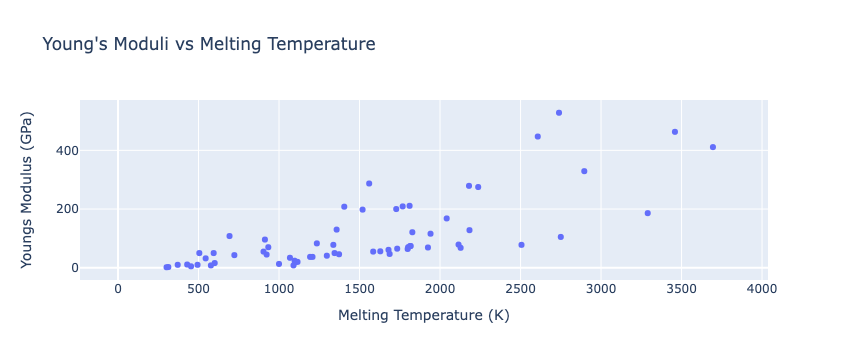

In [10]:
import plotly #This is the library import
import plotly.graph_objs as go # This is the graphical object (Think "plt" in Matplotlib if you have used that before)

from plotly.offline import iplot # These lines are necessary to run Plotly in Jupyter Notebooks, but not in a dedicated environment
plotly.offline.init_notebook_mode(connected=True)

# To create a plot, you need a layout and a trace

# The layout gives Plotly the instructions on the background grids, tiles in the plot, 
# axes names, axes ticks, legends, labels, colors on the figure and general formatting.

layout = go.Layout(title = "Young's Moduli vs Melting Temperature",xaxis= dict(title= 'Melting Temperature (K)'), 
                   yaxis= dict(title= 'Youngs Modulus (GPa)'))

# The trace contains a type of plot (In this case, Scatter, but it can be "Bars, Lines, Pie Charts", etc.), 
# the data we want to visualize and the way ("Mode") we want to represent it.

trace = go.Scatter(x = melting_temperature, y = youngs_modulus, mode = 'markers')

# To plot, we create a figure and implement our components in the following way:

data = [trace] # We could include more than just one trace here

fig= go.Figure(data, layout=layout)
iplot(fig)

#### CUSTOM PLOTS

Now that we know how to make a basic plot, we can start adding more details to end up with something that looks a little bit better. All modifications are explained in the comments, but you can also find that information [here](https://plot.ly/python/axes/).

Before we start our new plot, wouldn't it look better if we could visualize the points with the elements' names and color them according to their crystal structures?

In [11]:
# Here we are creating a function that takes a value X (Which will be the Symbol of the Element) 
# and returns a color depending on what its crystal structure is in our arrays from the beginning.
# That is because we want to color data according to the crystal structure; therefore, we will have to pass this info to the plot

def SetColor_CrystalStr(x):
    if x in fcc_elements:
        return "red" #This are standard CSS colors, but you can also use Hexadecimal Colors (#009900) or RGB "rgb(0, 128, 0)"
    elif x in bcc_elements:
        return "blue"
    elif x in hcp_elements:
        return "yellow"
    else:
        return "lightgray"
    
# We will then create a list that passes all element symbols through this function. For that we will use the python function "map"    
# Map takes each element on a list and evaluates it in a function.

colors = list(map(SetColor_CrystalStr, sample))

# You can see this list of generated colors looks like by uncommenting this line

#print(colors)

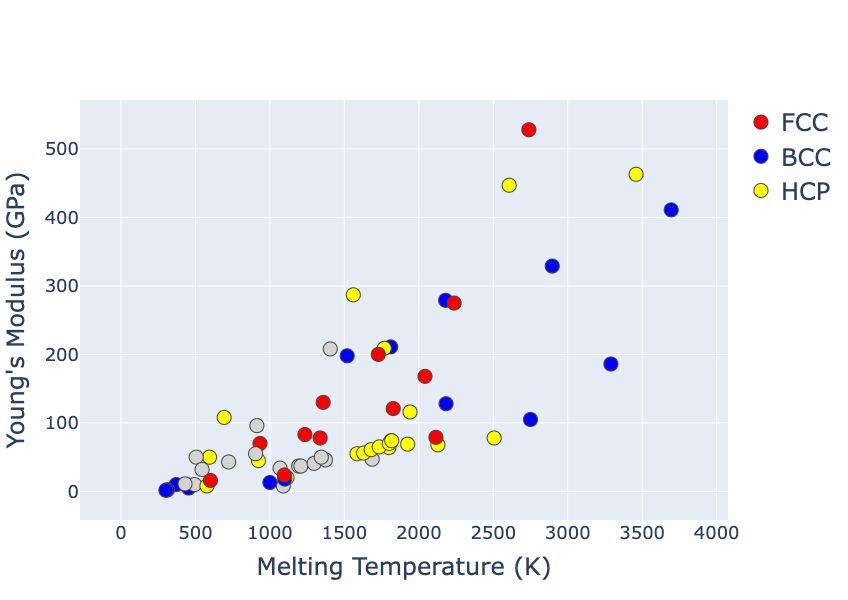

In [12]:
layout0= go.Layout(hovermode= 'closest', width = 600, height=600, showlegend=True,  # Hovermode establishes the way the labels that appear when you hover are arranged # Establishing a square plot width=height
    xaxis= dict(title=go.layout.xaxis.Title(text='Melting Temperature (K)', font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the X-axis Mark. Adding a Grid
    yaxis= dict(title=go.layout.yaxis.Title(text="Young's Modulus (GPa)", font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the Y-axis Mark. Adding a Grid
    legend=dict(font=dict(size=24))) # Adding a legend

# Trace

trace0 = go.Scatter(x = melting_temperature,y = youngs_modulus, mode = 'markers',
    marker= dict(size= 14, line= dict(width=1), color=colors), # We add a size, a border and our custom colors to the markers
    text= sample, # This attribute (Text) labels each point to this list, which contains our elements in the same indexes as our properties
showlegend = False)


# Empty Traces for Legend
legend_plot_FCC = go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=14,  line= dict(width=1),color='red'), name = 'FCC')
legend_plot_BCC = go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=14,  line= dict(width=1),color='blue'), name = 'BCC')
legend_plot_HCP = go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=14,  line= dict(width=1),color='yellow'), name = 'HCP')


data = [trace0, legend_plot_FCC, legend_plot_BCC, legend_plot_HCP]

fig= go.Figure(data, layout=layout0)
iplot(fig)

<font color=blue> **Exercise 3.**  a) Find the three metals with highest Young's moduli. b) What are the Young's moduli of Al, Fe and Pb? </font>

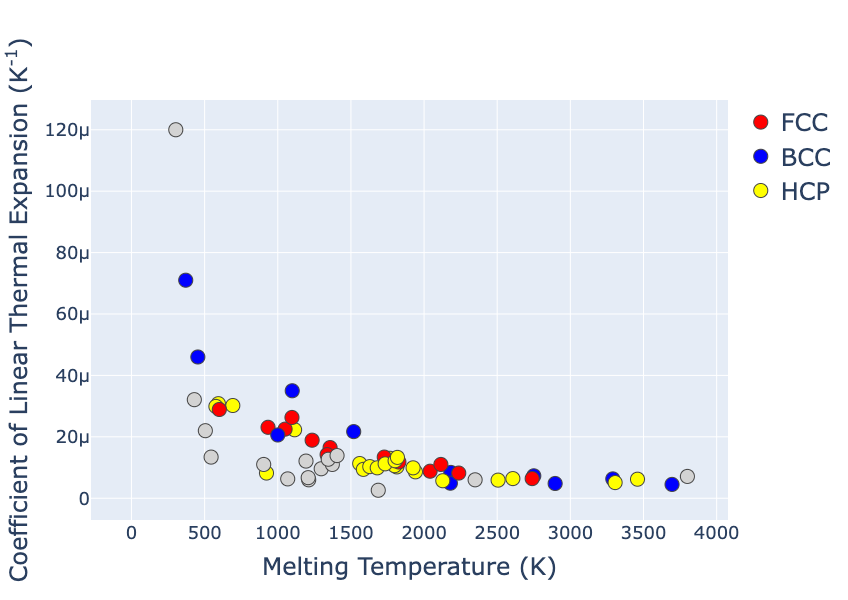

In [13]:
layout0= go.Layout(hovermode= 'closest', width = 600, height=600, showlegend=True,  # Hovermode establishes the way the labels that appear when you hover are arranged # Establishing a square plot width=height
    xaxis= dict(title=go.layout.xaxis.Title(text='Melting Temperature (K)', font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the X-axis Mark. Adding a Grid
    yaxis= dict(title=go.layout.yaxis.Title(text='Coefficient of Linear Thermal Expansion (K<sup>-1</sup>)', font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the Y-axis Mark. Adding a Grid
    legend=dict(font=dict(size=24))) # Adding a legend

# Trace

trace0 = go.Scatter(x = melting_temperature,y = CTE, mode = 'markers',
    marker= dict(size= 14, line= dict(width=1), color=colors), # We add a size, a border and our custom colors to the markers
    text= sample, # This attribute (Text) labels each point to this list, which contains our elements in the same indexes as our properties
showlegend = False)


# Empty Traces for Legend
legend_plot_FCC = go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=14,  line= dict(width=1),color='red'), name = 'FCC')
legend_plot_BCC = go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=14,  line= dict(width=1),color='blue'), name = 'BCC')
legend_plot_HCP = go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=14,  line= dict(width=1),color='yellow'), name = 'HCP')


data = [trace0, legend_plot_FCC, legend_plot_BCC, legend_plot_HCP]

fig= go.Figure(data, layout=layout0)
iplot(fig)

* <font color=blue> **Exercise 4.** Do you find correlations between the properties plotted? If so, what are the underlying reasons for them? </font>
 * <font color=blue> **Exercise 5.** Select a different pair or properties and create a similar plot. You can insert new cells below from the top menu (Insert -> Cell below) and copy and paste the code to create new plots.  </font>

### 4. Query from Mendeleev

Another database we can query in a similar way is Mendeleev. Mendeleev is an API (Application programming interface) dedicated library to provide access to element properties in the periodic table. Just as Pymatgen, Mendeleev also uses an object and attributes to handle a query. Mendeleev uses the **element** class (Note that is all lowercase). 

Making a query in Mendeleev can be done either by using the chemical symbol the same way Pymatgen does, or by providing the atomic number of the elements. Similarly, you can get a property by using it as an attribute for the object. Again, not all properties that you can query are listed here, but you can find them [here](https://mendeleev.readthedocs.io/en/stable/data.html). Note that there Mendeleev does not provide units when returning values, but you can find them in the previous link too. 

In this example we will query the thermal conductivity for the elements in the list "sample".

With a little bit of programming experience in Python you can again use the commented code to query all the properties listed for the "sample" elements.

In [14]:
querable_mendeleev = ["atomic_number", "atomic_volume", "boiling_point", "electron_affinity", "en_allen", "en_pauling", "econf", "evaporation_heat", "fusion_heat", "heat_of_formation",
                     "lattice_constant", "melting_point", "specific_heat", "thermal_conductivity"]
    
# You can get the same results using either of these two lists (Numbers correspond to the element's atomic number)
sample = ['Fe', 'Co', 'Ni', 'Cu', 'Zn']
#sample = [26,27,28,29,30]
    
for item in sample:    
    element_object = mendel.element(item)
    print(item, element_object.thermal_conductivity) # You can put any of the properties in the querable_mendeleev list
    
#for item in sample:
#    for i in querable_mendeleev:
#        element_object = mendel.element(item)
#        print(item, i, getattr(element_object,i))

Fe 80.4
Co 100.0
Ni 90.9
Cu 401.0
Zn 116.0
